<a href="https://colab.research.google.com/github/KhuramC/SoftwareTutorials/blob/main/B1_Creating_A_Single_Cell_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This self-learning module has three parts:  I. What is a neuron?   II. How do you model it in software?   III. How does the hardware implement the function of generating an action potential?
The module will introduce you to the neuron, the key cellular building block for our brains. This will be done sequentially. Part I will introduce you to the biological components that make up a neuron, i.e., the biological 'hardware'. Part II will show you how to model it (assemble in software) using the package NEURON. Part III. Will get into the details of how it actually works, i.e., how does the biological hardware produce its key function of generating an Action Potential.

# Part I.  What is a neuron made of? That is, what is the biological hardware?  
You may have learned about the structure of a cell in your high school or first year college biology. But if not, we will introduce you to the components. First, a neuron is a cell that is specialized for functioning in the nervous system. Cells in the various organs of the body have their own functions, and the cells in the brain are designed to provide "spikes" or "action potentials" as we will see in this course. So, what are the components that make up the cell called neuron?  Can you make a list first before you view the videos below?
1.   Create a list of the all necessary biological 'hardware' to make a neuron.
2.   Then make a sketch of the neuron and label all the components. Again, do this before you view the videos below.

Next view the videos below related to what is a neuron and what are its components.


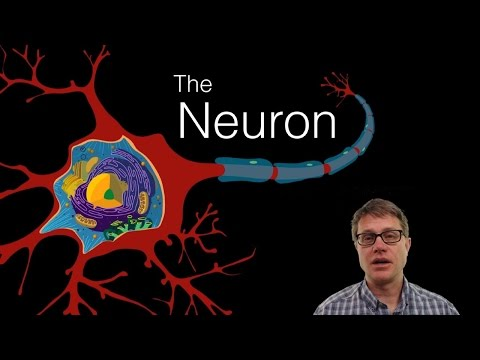

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('HZh0A-lWSmY')

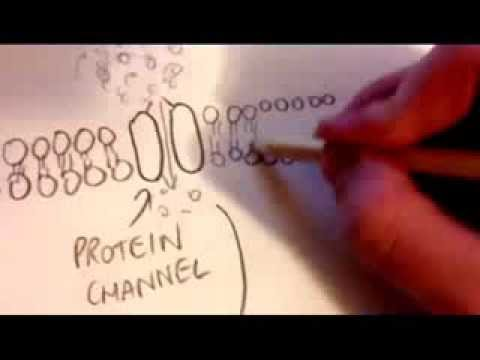

In [2]:
YouTubeVideo('x8ROEj2SFes')

# Components of a Neuron Continued
Your drawing should highlight the current injection into the soma, the neuron as a capacitor with liquid plates, the leak channel acting as a resistor and battery based off its reversal potential, amongst a couple of more concepts. An example of a drawing of the biological model of a neuron is given here:
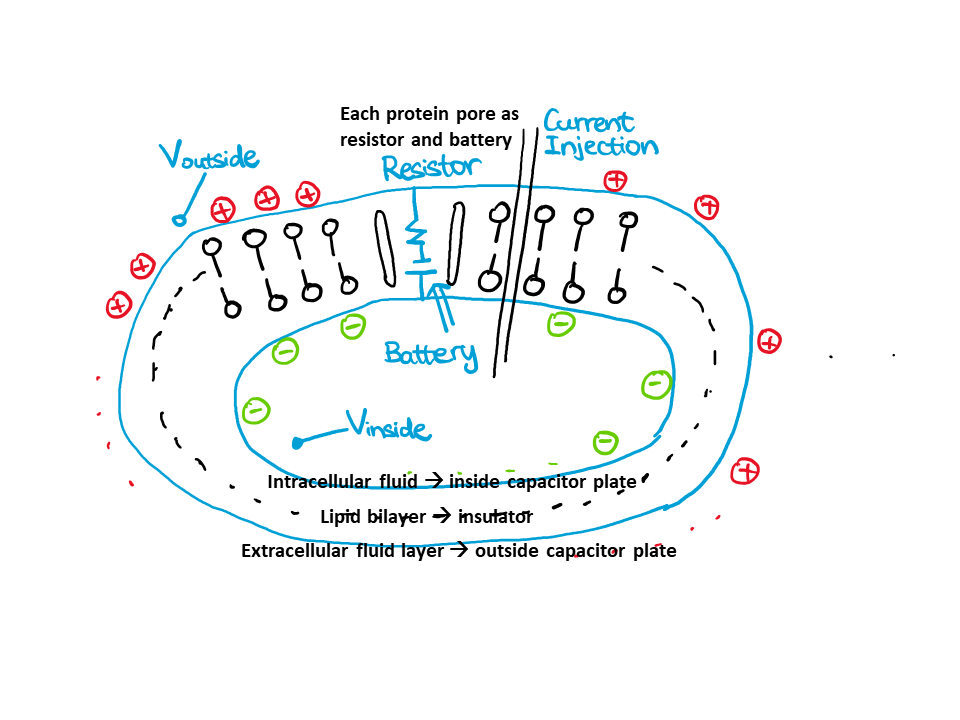

# Question Set A
1. Make the complete parts list of all the biological hardware needed to make a neuron.
2. Add the typical dimensions of each of the component and/or its specifications.
3. Resketch the biological model of the neuron without looking at it (make sure to upload this second sketch).

# Part II. From Biological Schematic to Electrical Schematic and then to the Computer Model

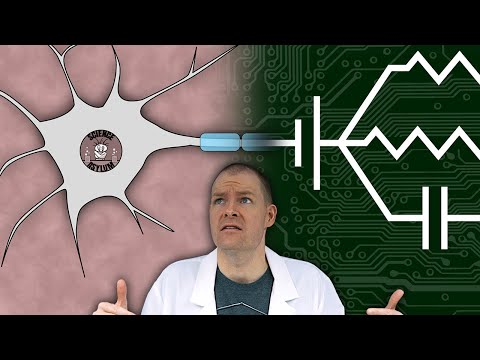

In [3]:
YouTubeVideo('YQsSrW5oX80')

## Installation of NEURON

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 7.2 MB/s eta 0:00:00


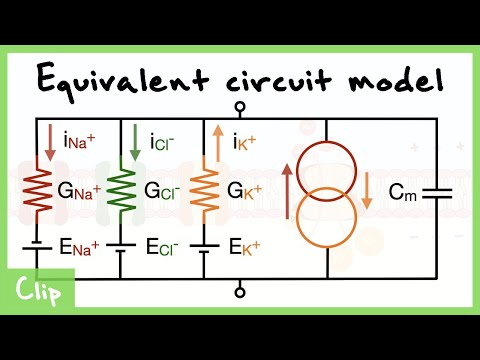

In [4]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
  !pip install neuron #installs NEURON if in google Colab

from IPython.display import YouTubeVideo
YouTubeVideo('LdumhvDBpzQ')

# let's begin making the computer model
So how do we create the soma with these things within NEURON? It's actually very simple. NEURON defines parts of the cell as sections. NEURON defines sections as cylindrical sections, with a diameter and a length.  A dendrite would be one section, the soma another, and the axon would be the last. When created, such sections are populated by default values.

![image](https://raw.githubusercontent.com/chenziao/Software_Tutorials_Colab/main/S1_PassiveMembrane/cylinder.png)

Every section can then be further subdivided into segments, which are equally lengthed segments that divide the section. Since nothing special is occuring in this notebook, we will divide the soma into three segments.



In [5]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
h.load_file('stdrun.hoc') #necessary to later do a simulation

1.0

In [6]:
soma = h.Section(name='Soma') #creates soma
soma.nseg = 3 #defines how many segments to divide soma into
print("The default length is " + str(soma.L) + " microns")
print("The default diameter is " + str(soma.diam) + " microns")
print("The default capacitance is " + str(soma.cm) + " microFarad / cm^2")
print("The default cytoplasmic resistivity is " + str(soma.Ra) + " ohm-cm")
soma.L = 35
soma.diam = 35
soma_length = soma.L
soma_diam = soma.diam


The default length is 100.0 microns
The default diameter is 500.0 microns
The default capacitance is 1.0 microFarad / cm^2
The default cytoplasmic resistivity is 35.4 ohm-cm


These values are unrealistic for mammalian neurons since they come from Hodgkin and Huxley's experiments with a squid giant axon. However, we can always change them to something different. Here we change the diameter and length to be 35 microns.
For more information on some neurons' typical geometries, click [here.](https://synapseweb.clm.utexas.edu/dimensions-dendrites)

# now that you have the structure of the model defined, let's add one type of protein channel called the 'leak' channel
One might notice that there is many things missing from our model so far. We have no channels, and as a result there is not even a resting membrane potential. So first, let's add the passive/leak channels to our soma.


In [7]:
soma.insert('pas') #inserts passive channel
print("Default E_leak = " +str(soma.e_pas) + " mV")
print("Default g_leak = " + str(soma.g_pas) + " S/cm^2")

Default E_leak = -70.0 mV
Default g_leak = 0.001 S/cm^2


The resting membrane potential is just e_leak. In this case, the default values are realistic.

# ...and then we add 'active' or voltage-gated channels (you will learn about these later in the course)
We have everything to model a passive membrane. However, active channels do exist, and can also be added. We will be inserting Hodgkin-Huxley channels to the soma, so their defaults will also be based off the squid giant axon. These hh channels also include a leak channel based off the squid giant axon, which we will not be using since we already have leak channels.



In [8]:
soma.insert('hh') #insert Hodgkin-Huxley channels
print("Default El_hh = " +str(soma.el_hh) + " mV")
print("Default gl_hh = " + str(soma.gl_hh) + " S/cm^2")
print("Default Ek = " +str(soma.ek) + " mV")
print("Default gkbar_hh = " + str(soma.gkbar_hh) + " S/cm^2")
print("Default Ena = " +str(soma.ena) + " mV")
print("Default gnabar_hh = " + str(soma.gnabar_hh) + " S/cm^2")
soma.gl_hh = 0 #changing soma's gleak_hh to be 0 as we already have passive channels, effectively disabling it.

Default El_hh = -54.3 mV
Default gl_hh = 0.0003 S/cm^2
Default Ek = -77.0 mV
Default gkbar_hh = 0.036 S/cm^2
Default Ena = 50.0 mV
Default gnabar_hh = 0.12 S/cm^2


# Now that the cell is fully defined, how do we fire it up? Set up a Current Clamp to inject current into the soma.
A current clamp injects a steady current into the soma and is typically used to measure the change in voltage. Current Clamps have four parameters: the location(so where in the soma on a 0-1 scale), the duration(how long you will be injecting current for), the amplitude(how much current), and delay(how long will you wait until you inject).

In [9]:
ic = h.IClamp(soma(0.5)) # middle of soma
ic.dur = 2.5 #ms
ic.amp = 1 #nA
ic.delay = 100 #ms

#Extras: Voltage Clamp
A voltage clamp holds the voltage at a steady state value and is used to measure the current. Voltage clamps do not have a delay parameter. We will only be showcasing current clamp in this lab, but the commented code below shows how one could implement a voltage clamp.

In [10]:
#vc = h.VClamp(soma(0.5)) #middle of soma
#vc.dur[0] = 500 #ms
#vc.amp[0] = -10 #mV

# Let's fire up the cell. That is, run the code we just generated, and check whether it produces an action potential - the key function of a neuron
Now we have a full cell with the necessary things. But how is the voltage going to change due to our clamps? If we start a simulation, we can find out. But we need to define how long the simulation is, how long each step forward in the simulation, and record the values throughout the simulation.

In [11]:
h.v_init= soma.e_pas #initial voltage is the resting membrane potential of the soma
h.tstop = tstop = 200 # how long to run the simulation in ms
h.dt = 0.025 # time step (resolution) of the simulation in ms

# define two vectors for recording variables
t_vec = h.Vector()
soma_v_vec = h.Vector()
# record the voltage (_ref_v) and time (_ref_t) and voltage(_ref_v) into the vectors we just created
t_vec.record(h._ref_t)
soma_v_vec.record(soma(0.5)._ref_v)
h.run() #run the simulation

0.0

# The model run saves the values of V vs time. Let's plot it and see what it looks like.
Even though we've ran the simulation, we need to show the results. Matplotlib allows us to graph our results with respect to time.
What do you think will happen to the soma's voltage throughout the simulation?


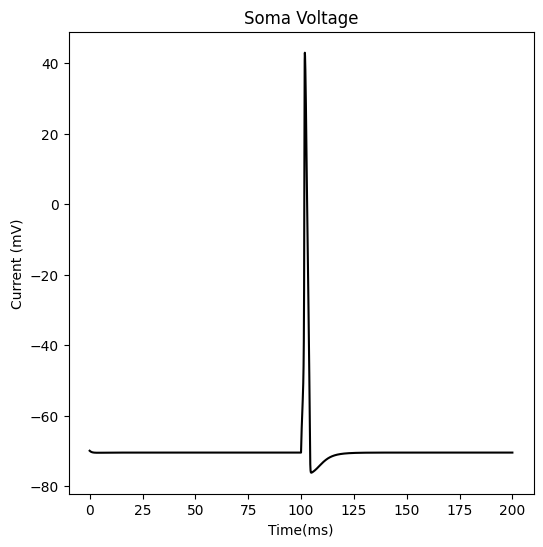

In [12]:
fig, axs = plt.subplots(1,1,figsize=(6, 6))
axs.plot(t_vec,soma_v_vec, color = 'black') #plotting time vs current
axs.set_title(str(soma) + ' Voltage')
axs.set_xlabel('Time(ms)')
axs.set_ylabel('Current (mV)')
plt.show()

An action potential occurs with the default values.  
Now let us look at a video that illustrates what happens in biology, i.e., how are the various ionic currents generated and how they interact to implement the action potential

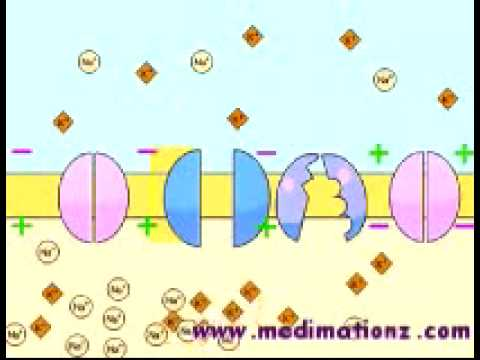

In [13]:
YouTubeVideo("U0NpTdge3aw")

# Part III. Figuring out how the biological hardware we put together and simulated ACTUALLY generates an action potential.
Below is an interactive tool that allows you too see how the morphology of the soma changes depending on the soma's length, diameter, and what channels are inserted in. You can then also see how that will change what happens to the soma's voltage throughout the simulation.

##Note
If you have an error saying "no module named 'neuron'" when trying to run this model, then run the cell of code with the title of 'Installation of NEURON'. After that, rerun the soma morphology plot and it should work.

In [14]:
#@title Soma Morpology Plot
#function for graphing soma morphology and voltage

#this is done just so that all you need to run this interactive model is have neuron installed(whether from pip or through the environment)
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
h.load_file('stdrun.hoc') #necessary to later do a simulation
soma = h.Section(name='Soma') #creates soma
soma.nseg = 3 #defines how many segments to divide soma into
soma.insert('pas') #inserts passive channel
soma.insert('hh') #insert Hodgkin-Huxley channels
soma.gl_hh = 0 #changing soma's gleak_hh to be 0 as we already have passive channels, effectively disabling it.
ic = h.IClamp(soma(0.5)) # middle of soma


def graph(soma_length,soma_diam,leak_channel,k_channel,na_channel,t_vec,soma_v_vec,ileak_vec,ik_vec,ina_vec):
  #Create the plot
  fig, axs = plt.subplots(3,1,figsize=(10, 8)) # 3 subplots of the same size

  #colors for the three different currents
  leak_color = 'purple'
  k_color = 'blue'
  na_color = 'red'
  soma_color = 'black'

  #Soma morphology
  #Make Soma
  #outer lines
  soma_xcoords = [0,soma_length]
  soma_ycoords = [-soma_diam/2,soma_diam/2]
  axs[0].plot(soma_xcoords,[-soma_diam/2,-soma_diam/2], color = soma_color) #bottom line
  axs[0].plot(soma_xcoords,[soma_diam/2,soma_diam/2], color = soma_color) #upper line
  axs[0].plot([0,0],soma_ycoords, color = soma_color) #left line
  axs[0].plot([soma_length,soma_length],soma_ycoords, color = soma_color) #right line

  #inner lines to indicate bilayer
  in_soma_xcoords = [soma_length*0.01, soma_length*0.99]
  in_soma_ycoords = [-soma_diam/2*0.77, soma_diam/2*0.77]
  axs[0].plot(in_soma_xcoords,[soma_diam/2*0.77,soma_diam/2*0.77],color = soma_color) #upper line
  axs[0].plot(in_soma_xcoords,[-soma_diam/2*0.77,-soma_diam/2*0.77],color = soma_color) #bottom line
  axs[0].plot([soma_length*0.01,soma_length*0.01],in_soma_ycoords,color = soma_color) #left line
  axs[0].plot([soma_length*0.99,soma_length*0.99],in_soma_ycoords,color = soma_color) #right line

  #axs[0].fill_between(soma_xcoords, soma_diam/2,-soma_diam/2, color = soma_color) #soma rectangle



  #Adding + and - to show that cell is naturally polarized.
  for i in range(int(soma_length)):
    if(i % int(soma_length/14+4) == 0 and i > 0 and i < (soma_length * 0.98)):
      axs[0].plot(i, soma_diam/2+soma_diam/3, marker = '+', color = 'black') #upper +
      axs[0].plot(i,soma_diam/2 * 0.25, marker = '_', color = 'black') #upper -

      axs[0].plot(i, -(soma_diam/2+ soma_diam/3), marker= '+', color = 'black') #lower +
      axs[0].plot(i,-(soma_diam/2 * 0.25), marker = '_', color = 'black') #lower -

  #Adding + and - to the sides of the cell
  axs[0].plot(soma_length*-0.025,0, marker = '+', color = 'black') #left +
  axs[0].plot(soma_length* 0.030,0, marker = '_', color = 'black') #left -

  axs[0].plot(soma_length* 1.025,0, marker = '+', color = 'black') #right +
  axs[0].plot(soma_length* 0.970,0, marker = '_', color = 'black') #right -

  #Add channels if they exist.
  if(leak_channel == 'Leak Channels'):
    for i in range(int(soma_length)):
      if(i % int(soma_length / 6 + 1) == 0 and i > 0):
        axs[0].plot(i, soma_diam/2*0.9, marker = 's', color = leak_color)
        axs[0].plot(i, -(soma_diam/2*0.85), marker= 's', color = leak_color)
  if(k_channel == 'K+ Channels'):
    for i in range(int(soma_length)):
      if(i % int(soma_length / 4 + 6) == 0 and i > 0):
        axs[0].plot(i, soma_diam/2*0.9, marker = 's', color = k_color)
        axs[0].plot(i, -(soma_diam/2*0.85), marker= 's', color = k_color)
  if(na_channel == 'Na+ Channels'):
    for i in range(int(soma_length)):
      if(i % int(soma_length / 5 + 3) == 0 and i > 0):
        axs[0].plot(i, soma_diam/2*0.9, marker = 's', color = na_color)
        axs[0].plot(i, -(soma_diam/2*0.85), marker= 's', color = na_color)
        continue


  # Add title and labels
  axs[0].set_title(str(soma) + ' Morphology')
  axs[0].set_xlabel('Length(um)')
  axs[0].set_ylabel('Height(um)')
  axs[0].set_ylim(-soma_diam*2,soma_diam*2)
  axs[0].set_xlim(-(soma_length*0.1),soma_length *1.1)



  #Soma Voltage
  axs[1].plot(t_vec,soma_v_vec, color = 'black') #plotting time vs voltage
  axs[1].set_title(str(soma) + ' Voltage')
  axs[1].set_xlabel('Time(ms)')
  axs[1].set_ylabel('Voltage (mV)')


  #Soma channel's currents.
  axs[2].plot(t_vec,ina_vec, color = na_color, label = 'Na+')
  axs[2].plot(t_vec,ik_vec, color = k_color, label = 'K+')
  axs[2].plot(t_vec,ileak_vec, color = leak_color, label = 'Leak')
  axs[2].legend(loc = 'upper right')
  axs[2].set_title(str(soma) + ' Currents')
  axs[2].set_xlabel('Time(ms)')
  axs[2].set_ylabel('Current (nA)')

  # Show the plot
  plt.tight_layout()
  plt.show()

def activemodel(soma_length,soma_diam,tstop, ic_dur,ic_amp,ic_delay,leak_channel,k_channel,na_channel):
  h.v_init= soma.e_pas #initial voltage is the resting membrane potential of the soma
  soma.diam = soma_diam
  soma.L = soma_length
  h.dt = 0.025 # time step (resolution) of the simulation in ms
  # define vectors for recording variables
  t_vec = h.Vector()
  soma_v_vec = h.Vector()
  ileak_vec = h.Vector()
  ik_vec = h.Vector()
  ina_vec = h.Vector()

  # record the voltage, time, and currents into the vectors we just created
  t_vec.record(h._ref_t)
  soma_v_vec.record(soma(0.5)._ref_v)
  ileak_vec.record(soma(0.5)._ref_i_pas)
  ik_vec.record(soma(0.5)._ref_ik)
  ina_vec.record(soma(0.5)._ref_ina)


  h.tstop = tstop
  ic.dur = ic_dur
  ic.amp = ic_amp
  ic.delay = ic_delay

  #check for if channels are open
  if(leak_channel == 'Leak Channels'):
    soma.g_pas = 0.001 #S/cm^2
  else:
    soma.g_pas = 0
  if(k_channel == 'K+ Channels'):
    soma.gkbar_hh = 0.036 #S/cm^2
  else:
    soma.gkbar_hh = 0
  if(na_channel == 'Na+ Channels'):
    soma.gnabar_hh = 0.12 #S/cm^2
  else:
    soma.gnabar_hh = 0
  h.run()
  plt.close('all')
  graph(soma_length,soma_diam,leak_channel,k_channel,na_channel,t_vec,soma_v_vec,ileak_vec,ik_vec,ina_vec)



import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display

#default settings
default_soma_length = 35 #microns
default_soma_diam = 35 #microns
default_leak_channel = 'No Leak Channels' #S/cm^2
#default_g_pas = 0.001 #S/cm^2
default_k_channel = 'No K+ Channels' #S/cm^2
default_na_channel = 'No Na+ Channels' #S/cm^2
default_tstop = 200 # how long to run the simulation in ms
default_ic_dur = 2.5 #ms
default_ic_amp = 1 #nA
default_ic_delay = 100 #ms

#Reset button
w_reset = widgets.Button(description ='Reset', icon = 'history', button_style ='primary')

#Textboxes
w_soma_length = widgets.BoundedFloatText(value = default_soma_length, min = 1, max = 10000, description = 'Length(um)')
w_soma_diam = widgets.BoundedFloatText(value = default_soma_diam, min = 1, max = 10000, description = 'Diameter(um)')
w_tstop = widgets.BoundedFloatText(value = default_tstop, min = 5, max = 1000, description = 'Tstop(ms)')
w_ic_dur = widgets.BoundedFloatText(value = default_ic_dur,min = 1, max = 500, description = 'Injection(ms)')
w_ic_amp = widgets.BoundedFloatText(value = default_ic_amp, min = -100, max = 100, description = 'Amp(nA)')
w_ic_delay = widgets.BoundedFloatText(value = default_ic_delay,min = 1, max = 400, description = 'Delay(ms)')

#defining reset
def reset_default(*args):
  w_soma_length.value = default_soma_length
  w_soma_diam.value = default_soma_diam
  passive_select.value = 'No Leak Channels'
  k_select.value = 'No K+ Channels'
  na_select.value = 'No Na+ Channels'
  w_tstop.value = default_tstop
  w_ic_dur.value = default_ic_dur
  w_ic_amp.value = default_ic_amp
  w_ic_delay.value = default_ic_delay
w_reset.on_click(reset_default)

#radio buttons for channel selections
passive_select = widgets.RadioButtons(options = ['Leak Channels', 'No Leak Channels'], value = 'No Leak Channels',description = 'Leak:', disabled = False)
k_select = widgets.RadioButtons(options = ['K+ Channels', 'No K+ Channels'], value = 'No K+ Channels', description = 'K+:', disabled = False)
na_select = widgets.RadioButtons(options = ['Na+ Channels', 'No Na+ Channels'], value = 'No Na+ Channels', description = 'Na+:', disabled = False)

#saying what function to be done based on the widget values
out = interactive_output(activemodel,{'soma_length': w_soma_length,'soma_diam':w_soma_diam,'tstop':w_tstop,'ic_dur':w_ic_dur,'ic_amp':w_ic_amp,'ic_delay':w_ic_delay,'leak_channel':passive_select,'k_channel':k_select,'na_channel':na_select})
#how to display the buttons/widgets
ui = HBox([w_reset,VBox([w_soma_length,w_soma_diam]),VBox([na_select,k_select,passive_select]),VBox([w_tstop,w_ic_dur,w_ic_amp,w_ic_delay])])


display(ui,out)

Output()

# Question Set B
4. Using the interactive figure above, set Na(sodium) conductance to zero. Explain what happens to voltage as a function of time.  Also, try to explain the phenomenon at the ionic level for the following two cases (assuming you have a high-powered microscope to see ions): no current injection, with a constant current injection.
5. Now set only the K(Potassium) conductance to zero. Explain what happens to voltage as a function of time.  Also, try to explain the phenomenon at the ionic level for the following two cases (assuming you have a high-powered microscope to see ions): no current injection, with a constant current injection.
6. Go back to default values for the Na and K conductances. Set the delay to 25ms and tstop as 225ms. Set the injection(of current) time to 100ms. Increase the magnitude of the injection current from 1-2 in steps of 0.1 and describe what happens to the firing frequency.  Plot the firing rate (F) vs current injection (I) curve, the so-called F-I curve of a neuron.

# Question Set C
MORPHOLOGY
7. What do the + and - signs represent for the soma morphology?
8. Why is the soma divided into two parts?
9. Why does the soma look like a rectangle when it is supposed to be modeled as a cylinder in NEURON?

DYNAMICS
10. Put only leak channels in and note the voltage. Describe in steps, what happens from the time the current injection starts till the voltage reaches steady state
11. Now add the active channel Na+ (only) to the setup with leak channels, and note what happens to the voltage. Can you provide the same step-by-step description as above
12. Now add the active channel K+ (only) to the setup with leak channels, and note what happens to the voltage. Can you provide the same step-by-step description as above
13. Now consider the case with leak, Na+ and K+ channels, and describe step-by-step what you see.

# Extras: Adding More Sections
A neuron is more than just a soma, why not add something else, like an axon.
An axon is also just a section and can be created in the same way, but it does need to be connected to the soma. Here we demonstrate how to add an axon and connect it to the soma, but we will not be focusing on it really in this lab.

In [15]:
#axon = h.Section('axon')
#axon.L = 40
#axon.nseg = 3 # divided into 3 equally lengthed segments
#axon.connect(soma(1)) #connect axon to the right end of the soma
#h.topology() # shows topology of full cell

# Conclusion
You should now know how NEURON simulates a neuron, how to create a single cell model with channels using NEURON, the morphology of the soma, and how to use NEURON to conduct experiments/simulations of your own. For more help on how to use NEURON, click [here](http://web.mit.edu/neuron_v7.4/nrntuthtml/tutorial/tutA.html) and [here.](https://nrn.readthedocs.io/en/latest/tutorials/scripting-neuron-basics.html)